Import libraries

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split

Load data

In [2]:
df = pd.read_csv("../data/processed/final_ml_dataset.csv")

Feature columns

In [9]:
categorical_cols = [
    "gender","partner","dependents",
    "phone_service","multiple_lines","internet_service",
    "online_security","online_backup","device_protection",
    "tech_support","streaming_tv","streaming_movies",
    "contract","paperless_billing","payment_method"
]

numeric_cols = [
    "senior_citizen","tenure","monthly_charges","total_charges", "support_calls"
]

Train-Test split

In [10]:
X = df[categorical_cols + numeric_cols]
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Load preprocessor

In [11]:
preprocessor = joblib.load("../models/preprocessor.pkl")

In [12]:
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

MOdels

In [13]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

Model Training & finding roc-auc score

In [14]:
results = []

for name, model in models.items():
    model.fit(X_train_prep, y_train)
    probs = model.predict_proba(X_test_prep)[:, 1]
    auc = roc_auc_score(y_test, probs)
    results.append([name, auc])

df_results = pd.DataFrame(results, columns=["Model", "ROC-AUC"])
df_results.sort_values(by="ROC-AUC", ascending=False, inplace=True)
df_results

,Model,ROC-AUC
3,Gradient Boosting,0.844937
0,Logistic Regression,0.839514
2,Random Forest,0.822125
6,XGBoost,0.820063
5,SVC,0.783956
4,KNN,0.781711
1,Decision Tree,0.667938


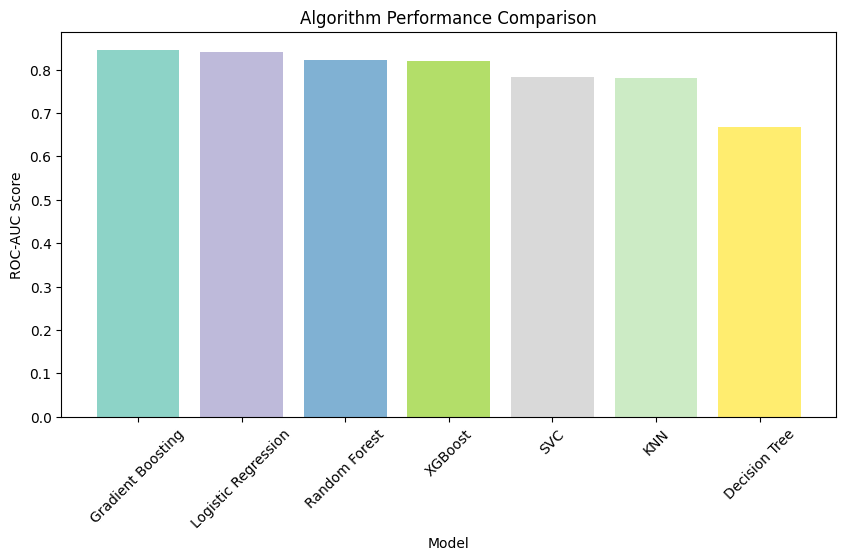

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))

colors = plt.cm.Set3(np.linspace(0, 1, len(df_results)))

plt.bar(df_results["Model"], df_results["ROC-AUC"], color=colors)

plt.xlabel("Model")
plt.ylabel("ROC-AUC Score")
plt.title("Algorithm Performance Comparison")
plt.xticks(rotation=45)
plt.show()